# Exploring Mushrooms

When asked to think of a mushroom, you might imagine the following:

![this shows a photo of some generic button mushrooms in a forest.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/generic_mushroom.jpg)

It's a beige, convex mushroom top with a uniform, thick stem. Maybe you thought of it cut up on a slice of delicious pizza or braised with sauce over rice. Regardless, you most likely did not consider this:

![A photo of some beautiful mushrooms in a forest. They do not have the signature "mushroom top" and have visually appealing grooves that make them look almost like floral.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/pretty_mushroom.jpg)

Mushrooms exist in a variety of different colors, shapes, sizes, textures, etc. In this project, you will analyze an extensive mushroom dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom) using bar charts and acquaint yourself with the diverse array of mushrooms that exist worldwide.

## Looking Over the Data

1. Take a look at the code block below where we've loaded **mushroom_data.csv**. It contains 23 columns of data describing thousands of mushrooms. In the output below the code block, data about five different mushrooms is shown.

   Read through this table to get a sense of the type(s) of variables in the data and the structure of the table. It may also be helpful to read through the information on [Kaggle](https://www.kaggle.com/uciml/mushroom-classification).
   
   Before you move on to plotting any of this data, answer the following questions:
   * What type(s) of variables does **mushroom_data.csv** contain?
   * How many of the variables can we visualize effectively with a bar graph?
   
   View **Exploring Mushrooms_Solution.ipynb** to see our answers.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load in the data
df = pd.read_csv("mushroom_data.csv")
print(df.head(2))
print(df.dtypes)

       Class Cap Shape Cap Surface Cap Color  Bruises     Odor  \
0  Poisonous    Convex      Smooth     Brown     True  Pungent   
1     Edible    Convex      Smooth    Yellow     True   Almond   

  Gill Attachment Gill Spacing Gill Size Gill Color  ...  \
0            Free        Close    Narrow      Black  ...   
1            Free        Close     Broad      Black  ...   

  Stalk Surface Below Ring Stalk Color Above Ring Stalk Color Below Ring  \
0                   Smooth                  White                  White   
1                   Smooth                  White                  White   

  Veil Type Veil Color Ring Number Ring Type Spore Print Color Population  \
0   Partial      White         One   Pendant             Black  Scattered   
1   Partial      White         One   Pendant             Brown   Numerous   

   Habitat  
0    Urban  
1  Grasses  

[2 rows x 23 columns]
Class                       object
Cap Shape                   object
Cap Surface                

2. There are 23 variables in this dataset (one for each column). One of them (the `Bruises` variable) has `True` or `False` responses. This will create problems when we try to plot this column later on. 

   One way we can fix this issue is by converting each `True` and `False` value to a string. Iterate through the elements in the `Bruises` variable and convert each value to a string using the `str()` method.
   
   Now, all our variables are of `object` types, which means we can graph them. Graphing each one individually would be tedious; luckily, you will use loops.

   If you look at the code block below, you will see an attribute called `columns`. This attribute returns the name of each variable in **mushroom_data.csv**.
   - Create a loop that traverses each `column` in the `columns` list.
   - Print each `column` in `columns` while iterating through the loop. This is to check that your `for` loop is working correctly.

In [ ]:
# list of all column headers
columns = df.columns.tolist()
for values in range(len(df.Bruises)):
    df.Bruises[values] = str(df.Bruises[values])
print(df.Bruises.head())
# print(f"\n\nHaving previewed the dataset we've confirmed {len(columns)} columns across and {len(df)} rows downwards, The columns are: \n")
# # for column in columns:
# #     print(column)


0     True
1     True
2     True
3     True
4    False
Name: Bruises, dtype: object


Having previewed the dataset we've confirmed 23 columns across and 8124 rows downwards, The columns are: 

Class
Cap Shape
Cap Surface
Cap Color
Bruises
Odor
Gill Attachment
Gill Spacing
Gill Size
Gill Color
Stalk Shape
Stalk Root
Stalk Surface Above Ring
Stalk Surface Below Ring
Stalk Color Above Ring
Stalk Color Below Ring
Veil Type
Veil Color
Ring Number
Ring Type
Spore Print Color
Population
Habitat


In [35]:
# Manual profiling report

# dataset info
dataset_info = df.info()

# Summary statistics all for categorical data
summary = df.describe(include='all')

# Count of unique values in each column
unique_counts = df.nunique()

# Count of missing values in each column
missing_values = df.isnull().sum()

# Top 5 most frequent values per column
top_frequencies = {col: df[col].value_counts().head() for col in df.columns}

# Compile results into a dictionary
manual_profile = {
    "Dataset Info": str(dataset_info),
    "Summary Statistics": summary,
    "Unique Value Counts": unique_counts,
    "Missing Values": missing_values,
    "Top Frequencies": top_frequencies
}

manual_profile_summary = {
    "columns": df.columns.tolist(),
    "num_columns": df.shape[1],
    "num_rows": df.shape[0],
    "num_missing_columns": missing_values[missing_values > 0].shape[0],
    "num_unique_columns": (unique_counts == 1).sum(),
}

def return_values():
    print(manual_profile)
    print("\n\n\n\n\n")
    return manual_profile_summary

print(return_values())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap Shape                 8124 non-null   object
 2   Cap Surface               8124 non-null   object
 3   Cap Color                 8124 non-null   object
 4   Bruises                   8124 non-null   object
 5   Odor                      4596 non-null   object
 6   Gill Attachment           8124 non-null   object
 7   Gill Spacing              8124 non-null   object
 8   Gill Size                 8124 non-null   object
 9   Gill Color                8124 non-null   object
 10  Stalk Shape               8124 non-null   object
 11  Stalk Root                8124 non-null   object
 12  Stalk Surface Above Ring  8124 non-null   object
 13  Stalk Surface Below Ring  8124 non-null   object
 14  Stalk Color Above Ring  

3. Great job! In relatively few lines of code below, you would have created 23 informative plots. Now that they are titled, labeled clearly, and ordered, you can really dive in on your analysis.

   Think about how someone could best use these visualizations. It is easy to tell which features of mushrooms are most common and rare, and we get insights into the variety of mushrooms in the fungi kingdom.
   
   Spend some time looking over the graphs. Write down exciting insights you find. Here are some examples to get you started:
   - It is a roughly equal split between mushrooms that are edible vs. poisonous.
   - The majority of mushrooms in this dataset have a scaly surface.
   - There are a non-insignificant amount of mushrooms that give off an almond scent?!!!
   - Most top surfaces of mushrooms in this dataset are scaly rather than smooth.
   
   Some of your analysis may also require research into mushroom features for any of the x-labels. We hope you enjoy continuing to explore the world of these fun guys!

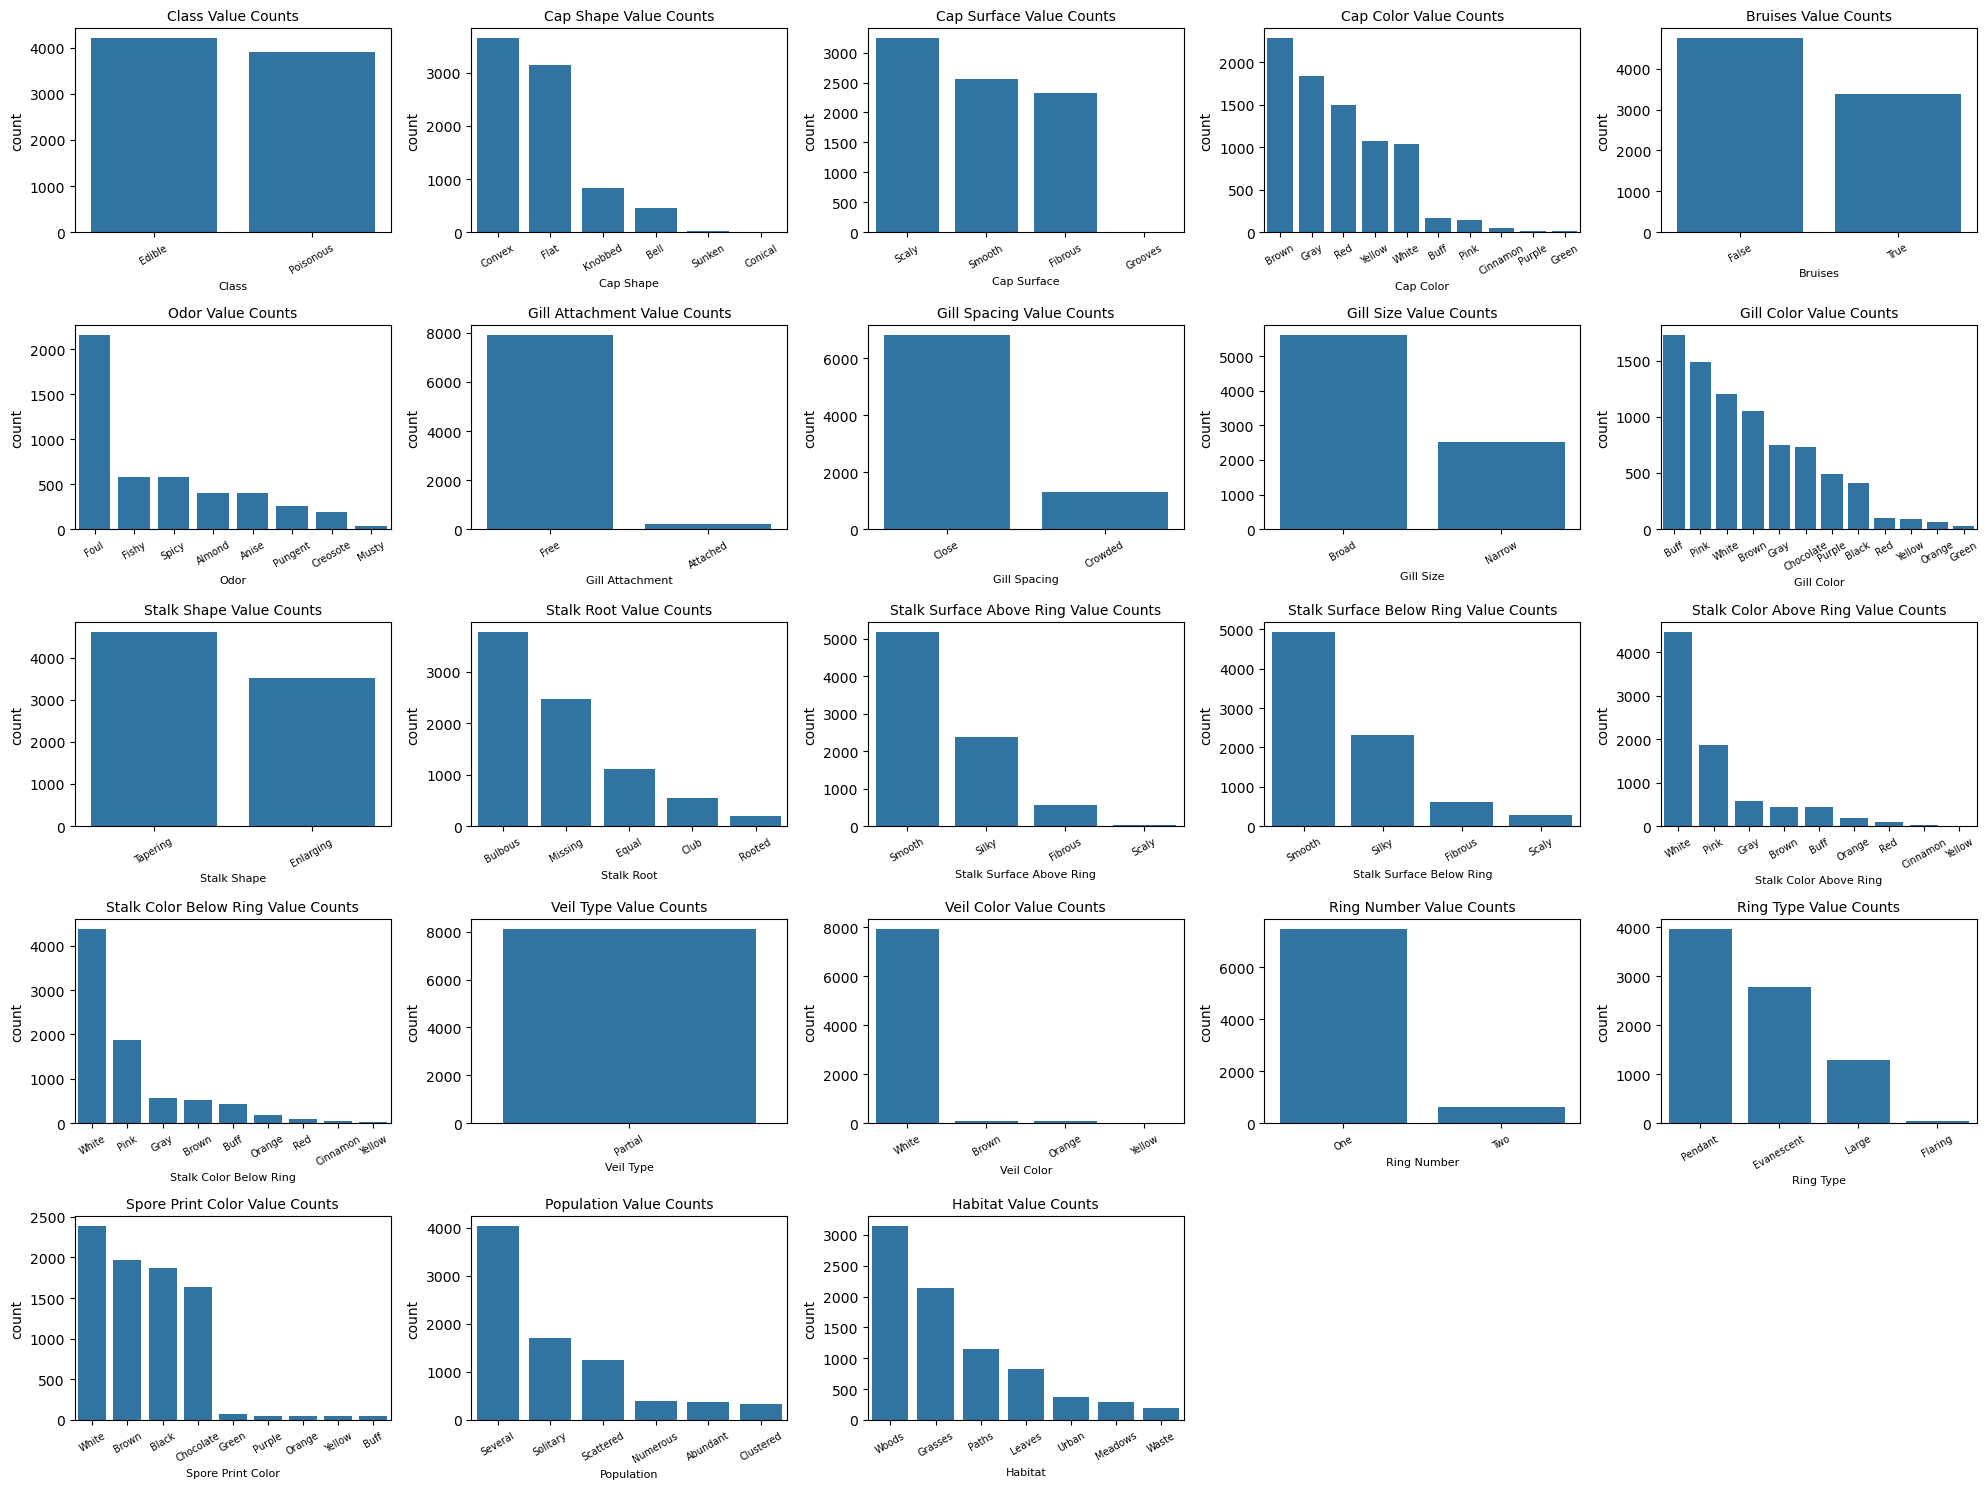

<Figure size 640x480 with 0 Axes>

In [ ]:
# plotting every chart in a 5x5 view for space management
rows, cols = 5, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust size as needed
fig.tight_layout(pad=4.0)

# Flatten axes array to easily index with a single loop
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    sns.countplot(x=df[column], data=df, order=df[column].value_counts().index, ax=ax)
    ax.set_title(f"{column} Value Counts", fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
        tick.set_fontsize(7)

# check if plots are less that 25 and keep the remaining chart's space
for j in range(len(columns), rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
# plt.savefig('nifeplot.png')

# Analysis from the above data visualizations


## General Insights:

    Class Distribution (Edible vs Poisonous):
        1. Fairly balanced split between edible and poisonous mushrooms.
        2. Important for classification models — good class balance for training.

    Odor Distribution:
        1. 'Foul' odor is the most common among odor categories.
        2. Odor may be a strong indicator for distinguishing mushroom types, especially edibility.

    Gill Attachment & Veil Type:
        1. One category in each completely dominates (e.g., "Free" for gill attachment and "Partial" for veil type).
        2. Not useful for classification due to low variance — may be dropped or considered constant.

    Spore Print Color:
        1. High frequency in white, brown, and black. Rare colors include green and purple.
        2. Potentially informative for identification purposes.

##  Category Distributions & Observations:

| Feature         | Insights                                                                  |
| --------------- | ------------------------------------------------------------------------- |
| `Cap Shape`     | Convex is most common; knobbed and sunken are rare.                       |
| `Cap Surface`   | Smooth and scaly dominate.                                                |
| `Cap Color`     | Brown and yellow most common; green and purple are rare.                  |
| `Bruises`       | Majority don’t bruise.                                                    |
| `Gill Spacing`  | Crowded gills vastly dominate.                                            |
| `Gill Size`     | Broad gills dominate.                                                     |
| `Gill Color`    | Wide variety; brown is most common.                                       |
| `Stalk Shape`   | Enlarging and Tapering have high counts.                                  |
| `Stalk Root`    | Several roots present; some missing values (suggests preprocessing need). |
| `Stalk Surface` | Smooth surface above/below the ring dominates.                            |
| `Stalk Color`   | White dominates above and below ring.                                     |
| `Veil Color`    | White overwhelmingly dominates — again, low variance.                     |
| `Ring Number`   | One ring is far more common.                                              |
| `Ring Type`     | Pendate and evanescent dominate.                                          |
| `Population`    | Scattered and numerous are common.                                        |
| `Habitat`       | Most mushrooms are found in woods; grasses also significant.              |

## Potential Uses for Analysis:

    Feature Selection for ML Models:

    Drop or downweight features like veil-type, veil-color, and gill-attachment (low variance).

    Focus on odor, gill-color, spore-print-color, and habitat for their richness.

    Anomaly Detection:

    Rare features (e.g., green cap, none root, sunken cap) could be indicative of rare species or mislabeled data.

    Mushroom Identification:

    Combine odor, cap-color, spore-print-color, and habitat to form a robust identification approach.

    Exploratory Analysis for Poisonous Patterns:

    Cross-analyze class (edible/poisonous) with high-information features to identify strong poison indicators.

## Extensions

4. Feel free to play around with the graphs and customize them any way you want to help in your analysis! Here are some ideas to get yourself started:
    * Turn any bar graph with less than six bars into a pie chart (hint: use a conditional statement!).
    * Create your bar charts using a list comprehension instead of a `for` loop.
    * Change the color theme of your graphs using the seaborn [color](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [palette](https://seaborn.pydata.org/tutorial/color_palettes.html) parameters.
    * Remove any graphs you find uninformative.
    * Change around the current title or label formatting.
    
    Happy Coding! :)

In [39]:
# Turn bar charts with fewer than six categories into pie charts

# fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
# axes = axes.flatten()

# for i, column in enumerate(columns[:23]): 
#     unique_vals = df[column].value_counts()
#     ax = axes[i]
    
#     if len(unique_vals) < 6:
#         ax.pie(unique_vals, labels=unique_vals.index, autopct='%1.1f%%', startangle=140)
#         ax.set_title(f"{column} (Pie Chart)")
#     else:
#         sns.countplot(x=df[column], order=unique_vals.index, ax=ax, palette='pastel')
#         sns.set_palette('muted')
#         sns.set_style('whitegrid')
#         ax.set_title(f"{column} Value Counts")
#         for tick in ax.get_xticklabels():
#             tick.set_rotation(30)
#             tick.set_fontsize(7)

# plt.tight_layout()
# plt.show()